<a href="https://colab.research.google.com/github/shreyansh273/Football-Scouting/blob/main/Player_profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files = files.upload()

Saving all_players_stats.csv to all_players_stats.csv


In [ ]:
from google.colab import files
files = files.upload()

Saving players_value.csv to players_value.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
player_stats = pd.read_csv("all_players_stats.csv")
player_stats.drop("Unnamed: 0", axis=1, inplace=True)
player_stats.head(1)

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_total,shots_on_target,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,distance_from_goal,shots_free_kicks,...,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,progressive_carries,carries_into_final_third,carries_into_penalty_area,miscontrols,dispossessed,pass_targets,passes_received,passes_received_pct,progressive_passes_received,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,sca_og_for,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,League
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,29.0,1990.0,22,20,1777,19.7,0,1,0,0,0,2,0,0.0,0.05,0.05,0.0,0.05,1.2,1.2,0.8,2.0,0.06,0.04,0.1,0.06,0.1,18,6,33.3,0.91,0.3,0.0,0.0,20.3,3.0,...,72.0,405.0,643.0,344.0,38.0,1126.0,9.0,21.0,42.9,9.0,0.0,733.0,3522.0,1907.0,114.0,30.0,9.0,13.0,16.0,835.0,775.0,92.8,46.0,26.0,1.32,22.0,3.0,1.0,0.0,0.0,0.0,3.0,0.15,2.0,1.0,0.0,0.0,0.0,0.0,Premier-League


In [ ]:
player_value = pd.read_csv("players_value.csv")
player_value.drop("Unnamed: 0", axis=1, inplace=True)
player_value.head(1)

,Name,Field Position,Age,Market Value (Millions)
0,Pedro Henrique,Left Winger,31,1.08


In [ ]:
player_stats = player_stats.merge(player_value, how='left', left_on="player", right_on="Name").drop(["Name","Age"], axis=1)
player_stats.head(1)

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_total,shots_on_target,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,distance_from_goal,shots_free_kicks,...,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,progressive_carries,carries_into_final_third,carries_into_penalty_area,miscontrols,dispossessed,pass_targets,passes_received,passes_received_pct,progressive_passes_received,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,sca_og_for,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,League,Field Position,Market Value (Millions)
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,29.0,1990.0,22,20,1777,19.7,0,1,0,0,0,2,0,0.0,0.05,0.05,0.0,0.05,1.2,1.2,0.8,2.0,0.06,0.04,0.1,0.06,0.1,18,6,33.3,0.91,0.3,0.0,0.0,20.3,3.0,...,643.0,344.0,38.0,1126.0,9.0,21.0,42.9,9.0,0.0,733.0,3522.0,1907.0,114.0,30.0,9.0,13.0,16.0,835.0,775.0,92.8,46.0,26.0,1.32,22.0,3.0,1.0,0.0,0.0,0.0,3.0,0.15,2.0,1.0,0.0,0.0,0.0,0.0,Premier-League,Left-Back,6.3


In [ ]:
player_stats[player_stats.player.str.contains("Kimmich")]

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_total,shots_on_target,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,distance_from_goal,shots_free_kicks,...,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,progressive_carries,carries_into_final_third,carries_into_penalty_area,miscontrols,dispossessed,pass_targets,passes_received,passes_received_pct,progressive_passes_received,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,sca_og_for,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,League,Field Position,Market Value (Millions)
1381,Joshua Kimmich,de GER,MF,Bayern Munich,25.0,1995.0,27,25,2194,24.4,4,10,4,0,0,4,0,0.16,0.41,0.57,0.16,0.57,2.5,2.5,6.6,9.0,0.1,0.27,0.37,0.1,0.37,37,14,37.8,1.52,0.57,0.11,0.29,22.6,1.0,...,1365.0,737.0,35.0,2127.0,22.0,34.0,64.7,23.0,1.0,1581.0,10428.0,4973.0,182.0,59.0,5.0,22.0,26.0,1758.0,1659.0,94.4,61.0,117.0,4.8,72.0,38.0,1.0,3.0,2.0,1.0,17.0,0.7,11.0,6.0,0.0,0.0,0.0,0.0,Bundesliga,Defensive Midfield,81.0


In [ ]:
player_stats.describe()

,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_total,shots_on_target,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,distance_from_goal,shots_free_kicks,npxg_per_shot,xg_net,npxg_net,passes_completed,...,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,progressive_carries,carries_into_final_third,carries_into_penalty_area,miscontrols,dispossessed,pass_targets,passes_received,passes_received_pct,progressive_passes_received,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,sca_og_for,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,Market Value (Millions)
count,2895.000000,2895.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2896.000000,2896.000000,2346.000000,2896.000000,2896.000000,2346.000000,1969.000000,2343.000000,2893.000000,2343.000000,2893.000000,2893.000000,2893.000000,...,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2431.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2878.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2243.000000
mean,25.317098,1994.343351,19.262776,14.242403,1278.733080,14.208115,1.754834,1.220304,1.555939,0.198895,0.247238,2.520373,0.115677,0.103229,0.081443,0.184693,0.093035,0.174489,1.752506,1.563014,1.165572,2.729554,0.121773,0.078918,0.200722,0.111922,0.190805,15.087362,5.085635,29.992754,1.120204,0.346257,0.083167,0.275455,17.202732,0.599378,0.092134,0.003802,-0.005807,524.056689,...,86.248531,266.612859,386.477705,195.626685,28.724507,738.807466,12.492568,20.917041,61.764418,13.474248,0.839267,503.999309,2621.820947,1420.580366,54.558590,16.364328,4.829589,15.630487,14.562738,619.965088,523.814725,83.304448,43.165226,24.167992,1.800059,17.337366,2.126858,1.459385,1.223989,1.438299,0.582095,2.920152,0.196647,1.977186,0.185966,0.199793,0.238852,0.244037,0.074317,9.758744
std,4.649531,4.655466,11.685709,11.483710,988.699301,10.985646,3.405570,2.025012,2.902857,0.881872,1.026249,2.617781,0.344835,0.181622,0.229860,0.311215,0.163192,0.298543,3.030249,2.550227,1.662416,3.829837,0.201552,0.146385,0.266257,0.188663,0.254251,19.642266,7.713496,20.572875,1.578046,0.488765,0.110271,0.263859,5.827499,2.002650,0.058523,1.118327,1.096789,498.503830,...,192.352131,326.246809,378.554806,221.941336,39.388468,640.982192,16.231331,26.998912,22.004679,17.435014,1.661776,450.537137,2463.451989,1398.509848,58.733943,19.435142,8.747238,19.311614,17.238120,530.565116,472.403370,16.226273,60.320327,28.299734,2.792700,19.490526,5.602387,2.785092,1.989326,2.494686,1.004443,4.156373,0.375658,2.876101,0.661098,0.615195,0.588018,0.617212,0.285072,13.881569
min,14.000000,1977.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,0.000000,0.010000,-6.000000,-5.

In [ ]:
player_stats2 = player_stats.copy()
cols = player_stats2.columns[26:len(player_stats2.columns)-4]
for i in range(len(cols)):
  if ('per90' in cols[i]) or ('pct' in cols[i]):
    continue
  else:
    player_stats2[cols[i]+"_per90"] = player_stats2[cols[i]]/player_stats2["minutes_90s"]
    player_stats2.drop(cols[i], axis=1, inplace=True)
player_stats2.head(2)

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_on_target_pct,shots_total_per90,shots_on_target_per90,passes_pct,passes_pct_short,passes_pct_medium,passes_pct_long,dribble_tackles_pct,pressure_regain_pct,...,blocks_per90,blocked_shots_per90,blocked_shots_saves_per90,blocked_passes_per90,interceptions_per90,clearances_per90,errors_per90,touches_per90,touches_def_pen_area_per90,touches_def_3rd_per90,touches_mid_3rd_per90,touches_att_3rd_per90,touches_att_pen_area_per90,touches_live_ball_per90,dribbles_completed_per90,dribbles_per90,players_dribbled_past_per90,nutmegs_per90,carries_per90,carry_distance_per90,carry_progressive_distance_per90,progressive_carries_per90,carries_into_final_third_per90,carries_into_penalty_area_per90,miscontrols_per90,dispossessed_per90,pass_targets_per90,passes_received_per90,progressive_passes_received_per90,sca_passes_live_per90,sca_passes_dead_per90,sca_dribbles_per90,sca_shots_per90,sca_fouled_per90,sca_og_for_per90,gca_passes_live_per90,gca_passes_dead_per90,gca_dribbles_per90,gca_shots_per90,gca_fouled_per90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,29.0,1990.0,22,20,1777,19.7,0,1,0,0,0,2,0,0.00,0.05,0.05,0.00,0.05,1.2,1.2,0.8,2.0,0.06,0.04,0.10,0.06,0.10,33.3,0.913706,0.304569,78.9,88.7,81.3,52.0,35.7,33.5,...,1.573604,0.355330,0.050761,1.218274,1.725888,2.030457,0.050761,67.157360,3.654822,20.558376,32.639594,17.461929,1.928934,57.157360,0.456853,1.065990,0.456853,0.000000,37.208122,178.781726,96.802030,5.786802,1.522843,0.456853,0.659898,0.812183,42.385787,39.340102,2.335025,1.116751,0.152284,0.050761,0.000000,0.000000,0.0,0.101523,0.050761,0.0,0.0,0.000000
1,Tammy Abraham,eng ENG,FW,Chelsea,22.0,1997.0,22,12,1040,11.6,6,1,6,0,0,0,0,0.52,0.09,0.61,0.52,0.61,6.4,6.4,0.9,7.3,0.56,0.07,0.63,0.56,0.63,40.6,2.758621,1.120690,68.3,78.0,60.9,60.0,16.7,23.5,...,0.775862,0.172414,0.000000,0.603448,0.172414,1.465517,0.000000,30.689655,1.810345,3.448276,14.396552,14.310345,5.689655,29.913793,0.517241,1.637931,0.517241,0.172414,15.258621,61.120690,21.724138,1.120690,0.431034,0.344828,2.241379,1.120690,42.327586,21.637931,8.275862,0.948276,0.000000,0.086207,0.258621,0.258621,0.0,0.086207,0.000000,0.0,0.0,0.086207


In [ ]:
player_stats2 = player_stats2.loc[player_stats2.games_starts>10]
player_stats2.head(2)

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_on_target_pct,shots_total_per90,shots_on_target_per90,passes_pct,passes_pct_short,passes_pct_medium,passes_pct_long,dribble_tackles_pct,pressure_regain_pct,...,blocks_per90,blocked_shots_per90,blocked_shots_saves_per90,blocked_passes_per90,interceptions_per90,clearances_per90,errors_per90,touches_per90,touches_def_pen_area_per90,touches_def_3rd_per90,touches_mid_3rd_per90,touches_att_3rd_per90,touches_att_pen_area_per90,touches_live_ball_per90,dribbles_completed_per90,dribbles_per90,players_dribbled_past_per90,nutmegs_per90,carries_per90,carry_distance_per90,carry_progressive_distance_per90,progressive_carries_per90,carries_into_final_third_per90,carries_into_penalty_area_per90,miscontrols_per90,dispossessed_per90,pass_targets_per90,passes_received_per90,progressive_passes_received_per90,sca_passes_live_per90,sca_passes_dead_per90,sca_dribbles_per90,sca_shots_per90,sca_fouled_per90,sca_og_for_per90,gca_passes_live_per90,gca_passes_dead_per90,gca_dribbles_per90,gca_shots_per90,gca_fouled_per90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,29.0,1990.0,22,20,1777,19.7,0,1,0,0,0,2,0,0.00,0.05,0.05,0.00,0.05,1.2,1.2,0.8,2.0,0.06,0.04,0.10,0.06,0.10,33.3,0.913706,0.304569,78.9,88.7,81.3,52.0,35.7,33.5,...,1.573604,0.355330,0.050761,1.218274,1.725888,2.030457,0.050761,67.157360,3.654822,20.558376,32.639594,17.461929,1.928934,57.157360,0.456853,1.065990,0.456853,0.000000,37.208122,178.781726,96.802030,5.786802,1.522843,0.456853,0.659898,0.812183,42.385787,39.340102,2.335025,1.116751,0.152284,0.050761,0.000000,0.000000,0.0,0.101523,0.050761,0.0,0.0,0.000000
1,Tammy Abraham,eng ENG,FW,Chelsea,22.0,1997.0,22,12,1040,11.6,6,1,6,0,0,0,0,0.52,0.09,0.61,0.52,0.61,6.4,6.4,0.9,7.3,0.56,0.07,0.63,0.56,0.63,40.6,2.758621,1.120690,68.3,78.0,60.9,60.0,16.7,23.5,...,0.775862,0.172414,0.000000,0.603448,0.172414,1.465517,0.000000,30.689655,1.810345,3.448276,14.396552,14.310345,5.689655,29.913793,0.517241,1.637931,0.517241,0.172414,15.258621,61.120690,21.724138,1.120690,0.431034,0.344828,2.241379,1.120690,42.327586,21.637931,8.275862,0.948276,0.000000,0.086207,0.258621,0.258621,0.0,0.086207,0.000000,0.0,0.0,0.086207


In [ ]:
req_cols = ["player"]+player_stats2.columns[np.arange(26,len(player_stats2.columns))].tolist()
req_cols = [i for i in req_cols if i not in ["League","Field Position", "Market Value (Millions)","player"]]
req_cols = ['player','non_penalty_goals','assists'] + req_cols
dm_data = player_stats2.loc[player_stats2["Field Position"] == "Defensive Midfield", req_cols]
dm_data.shape

(121, 98)

In [ ]:
dm_data = dm_data[~dm_data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
dm_data.head(1)

,player,non_penalty_goals,assists,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_on_target_pct,shots_total_per90,shots_on_target_per90,passes_pct,passes_pct_short,passes_pct_medium,passes_pct_long,dribble_tackles_pct,pressure_regain_pct,dribbles_completed_pct,passes_received_pct,sca_per90,gca_per90,gca_og_for,goals_per_shot_per90,goals_per_shot_on_target_per90,distance_from_goal_per90,shots_free_kicks_per90,npxg_per_shot_per90,xg_net_per90,npxg_net_per90,passes_completed_per90,passes_per90,passes_total_distance_per90,passes_progressive_distance_per90,passes_completed_short_per90,passes_short_per90,passes_completed_medium_per90,passes_medium_per90,passes_completed_long_per90,passes_long_per90,xa_net_per90,...,blocks_per90,blocked_shots_per90,blocked_shots_saves_per90,blocked_passes_per90,interceptions_per90,clearances_per90,errors_per90,touches_per90,touches_def_pen_area_per90,touches_def_3rd_per90,touches_mid_3rd_per90,touches_att_3rd_per90,touches_att_pen_area_per90,touches_live_ball_per90,dribbles_completed_per90,dribbles_per90,players_dribbled_past_per90,nutmegs_per90,carries_per90,carry_distance_per90,carry_progressive_distance_per90,progressive_carries_per90,carries_into_final_third_per90,carries_into_penalty_area_per90,miscontrols_per90,dispossessed_per90,pass_targets_per90,passes_received_per90,progressive_passes_received_per90,sca_passes_live_per90,sca_passes_dead_per90,sca_dribbles_per90,sca_shots_per90,sca_fouled_per90,sca_og_for_per90,gca_passes_live_per90,gca_passes_dead_per90,gca_dribbles_per90,gca_shots_per90,gca_fouled_per90
19,Allan,0,0,0.01,0.04,0.05,0.01,0.05,28.6,0.307018,0.087719,85.8,92.0,89.3,72.5,29.8,28.4,65.1,95.9,1.666667,0.087719,0.0,0.0,0.0,0.95614,0.0,0.001316,-0.008772,-0.008772,39.429825,45.964912,744.912281,190.745614,16.184211,17.587719,16.754386,18.77193,5.657895,7.807018,-0.039474,...,1.710526,0.570175,0.0,1.140351,1.008772,1.315789,0.0,56.22807,3.245614,18.114035,36.27193,6.622807,0.131579,54.780702,1.22807,1.885965,1.27193,0.04386,35.482456,217.105263,128.72807,4.210526,1.403509,0.087719,0.614035,0.964912,38.201754,36.622807,0.745614,1.403509,0.0,0.175439,0.04386,0.04386,0.0,0.087719,0.0,0.0,0.0,0.0


In [ ]:
dm_data2 = dm_data.loc[:,['player','non_penalty_goals','npxg_per90','shots_total_per90','assists','xa_per90','npxg_xa_per90','sca_per90','passes_per90','passes_pct','progressive_passes_per90','progressive_carries_per90','dribbles_completed_per90','touches_att_pen_area_per90','progressive_passes_received_per90','pressures_per90','tackles_per90','interceptions_per90', 'blocks_per90','clearances_per90']]
dm_data2.set_index("player",inplace=True)
dm_data2.head(1)

,non_penalty_goals,npxg_per90,shots_total_per90,assists,xa_per90,npxg_xa_per90,sca_per90,passes_per90,passes_pct,progressive_passes_per90,progressive_carries_per90,dribbles_completed_per90,touches_att_pen_area_per90,progressive_passes_received_per90,pressures_per90,tackles_per90,interceptions_per90,blocks_per90,clearances_per90
player,,,,,,,,,,,,,,,,,,,
Allan,0,0.01,0.307018,0,0.04,0.05,1.666667,45.964912,85.8,3.596491,4.210526,1.22807,0.131579,0.745614,29.517544,3.289474,1.008772,1.710526,1.315789


In [71]:
dm_data_ranks = dm_data2.copy()
for i in range(len(dm_data2.columns)):
  dm_data_ranks[dm_data_ranks.columns[i]] = dm_data_ranks[dm_data_ranks.columns[i]].rank(pct=True)*100
dm_data_ranks = dm_data_ranks.astype(int)
dm_data_ranks.head()

,non_penalty_goals,npxg_per90,shots_total_per90,assists,xa_per90,npxg_xa_per90,sca_per90,passes_per90,passes_pct,progressive_passes_per90,progressive_carries_per90,dribbles_completed_per90,touches_att_pen_area_per90,progressive_passes_received_per90,pressures_per90,tackles_per90,interceptions_per90,blocks_per90,clearances_per90
player,,,,,,,,,,,,,,,,,,,
Allan,21,5,8,17,41,16,62,28,56,46,69,90,4,21,100,85,19,60,22
Sander Berge,21,45,52,49,85,76,73,10,24,13,84,95,100,95,56,15,0,50,33
Leander Dendoncker,60,96,84,17,29,76,57,18,77,8,20,20,98,80,59,17,18,81,81
Mohamed Elneny,60,31,28,17,6,10,14,64,99,41,64,22,9,10,7,1,28,6,28
Fabinho,21,16,14,17,6,4,7,88,93,45,85,5,18,11,10,59,69,32,96


Text(0.5, 1.0, 'Fabinho')

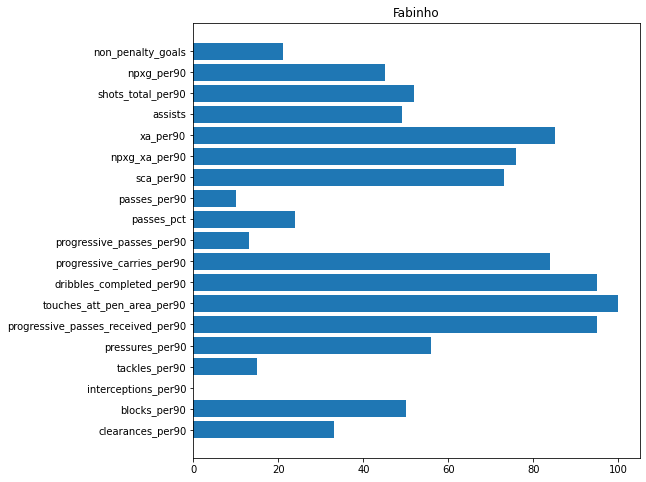

In [61]:
labels = dm_data_ranks.columns
values = dm_data_ranks.iloc[1]
title = dm_data_ranks.index.values[4]

fig, ax = plt.subplots(figsize=(8,8))
y = np.arange(len(labels))
ax.barh(y, values)
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_title(title)

In [75]:
overall_rank = pd.DataFrame(dm_data_ranks.mean(axis=1))
overall_rank.columns = ['rank']
overall_rank = overall_rank.astype(int)
overall_rank.sort_values('rank', ascending=False).head(20)

,rank
player,
Manuel Locatelli,77
Joshua Kimmich,76
Florian Grillitsch,75
Aurélien Tchouaméni,74
Casemiro,73
Rodri,69
Rúben Neves,68
Wataru Endo,68
Emre Can,66


In [80]:
dm_data_ranks[dm_data_ranks.index.str.contains("Diadie")]

,non_penalty_goals,npxg_per90,shots_total_per90,assists,xa_per90,npxg_xa_per90,sca_per90,passes_per90,passes_pct,progressive_passes_per90,progressive_carries_per90,dribbles_completed_per90,touches_att_pen_area_per90,progressive_passes_received_per90,pressures_per90,tackles_per90,interceptions_per90,blocks_per90,clearances_per90
player,,,,,,,,,,,,,,,,,,,
